In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
data_dir = 'D:/crs/proj/2019_CACO_CoastCam/Pixel_instruments/'
image_name = data_dir+'1724765400.Tue.Aug.27_13_30_00.GMT.2024.CACO03.c2.snap.jpg'
pixel_file = data_dir+'c2_timestack_short.pix'
#pixel_file = data_dir+'pixcamera1madbeach_20230117_20_90_150_250_cBathy.pix'

In [2]:
lines = np.loadtxt(pixel_file, delimiter=" ", unpack=False).astype(int)
(nr, nc ) = np.shape(lines)
print(nr, nc)

117 2


In [3]:
image = Image.open( image_name )
data = np.asarray( image )
print(np.shape(data))

(2048, 2448, 3)


In [4]:
nt = 1000
tstack = np.zeros((nt, nr, 3), dtype=int )
print(np.shape(tstack))

(1000, 117, 3)


In [5]:
%%time
for j in range(nt):
    image = Image.open( image_name )
    data = np.asarray( image )
    for i in range(nr):
        tstack[j,i,:] = (data[lines[i,1],lines[i,0],:])

CPU times: total: 53.9 s
Wall time: 53.9 s


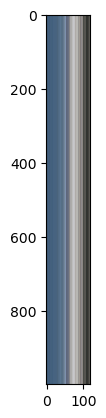

In [6]:
tsimage = Image.fromarray(tstack.astype(np.uint8).transpose(0,1,2) )
plt.imshow(tsimage)